# Megaline Plans Revenue Analysis

## Introduction

In this project, I am working with a sample of data from 500 Megaline clients. Megaline is a telecom operator that offers its clients two prepaid plans, Surf and Ultimate. For these plans, Megaline rounds seconds up to minutes for each individual call, and rounds megabytes to gigabytes for each month of service. Using this data, I will be analyzing the clients' behavior to determine which of these prepaid plan brings in more revenue. This analysis will be used by the commercial department in order to adjust the advertising budget. 

There are five datasets that I will be using for my analysis. These datasets consist of:
1. Megaline Calls: where each row corresponds with an individual call made by a client
2. Megaline Internet: where each row corresponds to an individual web traffic useage
3. Megaline Messages: where each row corresponds to an individual text message
4. Megaline Plans: where each row corresponds to the details of each prepaid plan
5. Megaline Users: where each row corresponds to an individual Megaline client and some basic info on the client

### Stages

1. Introduction
2. Data Preprocessing
3. Feature Engineering
4. Aggregate Data
5. Exploratory Data Analysis
6. Statistical Testing
7. General Conclusions

# Data Preprocessing

In [1]:
# Loading all the libraries
from scipy import stats as st
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the data files into different DataFrames
plans=pd.read_csv('megaline_plans.csv')
calls=pd.read_csv('megaline_calls.csv')
users=pd.read_csv('megaline_users.csv')
internet=pd.read_csv('megaline_internet.csv')
messages=pd.read_csv('megaline_messages.csv')

### `plans` df

In [3]:
# Print the general information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print data for plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### `calls` Dataframe

In [5]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
# Print a sample of data for calls
calls.sample(5,random_state=999)

,id,user_id,call_date,duration
106815,1379_13,1379,2018-12-06,19.60
15251,1061_193,1061,2018-05-17,4.51
119352,1415_400,1415,2018-07-11,13.71
126598,1450_92,1450,2018-12-25,0.00
41026,1151_204,1151,2018-12-26,15.27


In [7]:
# Change call_date column to datetime data type
# Round duration column up to the next minute and change to the integer data type
calls.call_date= pd.to_datetime(calls.call_date,format='%Y-%m-%d')
calls.duration = calls.duration.apply(np.ceil).astype('int')

In [8]:
# Check for duplicate values
calls.duplicated().sum()

0

In [9]:
# Double check that changes are correct
calls.info()
calls.sample(5,random_state=999)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
106815,1379_13,1379,2018-12-06,20
15251,1061_193,1061,2018-05-17,5
119352,1415_400,1415,2018-07-11,14
126598,1450_92,1450,2018-12-25,0
41026,1151_204,1151,2018-12-26,16


### `users` df

In [10]:
# Print the general information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Print a sample of data for users
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN
255,1255,Kennith,Rowland,22,"Oklahoma City, OK MSA",2018-08-01,ultimate,NaN
434,1434,Kai,Barr,18,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-06,surf,NaN
369,1369,Bernard,Mckee,69,"Milwaukee-Waukesha, WI MSA",2018-10-06,surf,NaN
241,1241,Lala,Walls,24,"Richmond, VA MSA",2018-08-27,surf,NaN


In [12]:
# Change reg_date column to datetime data type
# Change plan column to category data type
users.reg_date = pd.to_datetime(users.reg_date, format='%Y-%m-%d')
users.plan = users.plan.astype('category')

In [13]:
# Check for duplicate values
users.duplicated().sum()

0

In [14]:
# Check for unique values in the plan column
users.plan.unique()

['ultimate', 'surf']
Categories (2, object): ['surf', 'ultimate']

In [15]:
# Double check that changes are correct
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     object        
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 28.1+ KB


### `internet` df

In [16]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# Print a sample of data for the internet traffic
internet.sample(5)

,id,user_id,session_date,mb_used
75485,1355_170,1355,2018-12-20,165.78
32846,1147_498,1147,2018-05-18,546.49
67781,1315_17,1315,2018-12-14,139.55
22021,1100_225,1100,2018-11-29,0.00
81554,1382_141,1382,2018-12-09,0.00


In [18]:
# Change the session_date column to the datetime data type
internet.session_date = pd.to_datetime(internet.session_date,format='%Y-%m-%d')

In [19]:
# Check for duplicate values
internet.duplicated().sum()

0

### `messages` df

In [20]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# Print a sample of data for messages
messages.sample(5)

,id,user_id,message_date
2788,1028_718,1028,2018-03-17
4946,1046_8,1046,2018-08-11
51181,1331_356,1331,2018-09-04
30907,1194_66,1194,2018-12-13
57838,1364_169,1364,2018-12-29


In [22]:
# Change the message_date column to the datetime data type
messages.message_date = pd.to_datetime(messages.message_date,format='%Y-%m-%d')

In [23]:
# Check for duplicate values
messages.duplicated().sum()

0

## Feature Engineering

In [24]:
# Create a year, month & date column from the call_date column for the calls df
calls['year']=calls.call_date.dt.year
calls['month']=calls.call_date.dt.month
calls['day']=calls.call_date.dt.day
calls['dow']=calls.call_date.dt.dayofweek

In [25]:
# Check that changes are correct
calls.info()
calls.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   year       137735 non-null  int32         
 5   month      137735 non-null  int32         
 6   day        137735 non-null  int32         
 7   dow        137735 non-null  int32         
dtypes: datetime64[ns](1), int32(4), int64(2), object(1)
memory usage: 6.3+ MB


,id,user_id,call_date,duration,year,month,day,dow
4801,1022_67,1022,2018-09-16,0,2018,9,16,6
16436,1064_294,1064,2018-11-25,14,2018,11,25,6
109463,1385_533,1385,2018-12-10,2,2018,12,10,0
57494,1206_275,1206,2018-12-16,7,2018,12,16,6
123479,1435_109,1435,2018-10-22,8,2018,10,22,0


In [26]:
# Create year, month, day & day of week columns from the message_date column
messages['year']=messages.message_date.dt.year
messages['month']=messages.message_date.dt.month
messages['day']=messages.message_date.dt.day
messages['dow']=messages.message_date.dt.dayofweek

In [27]:
# Check that changes are correct
messages.info()
messages.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year          76051 non-null  int32         
 4   month         76051 non-null  int32         
 5   day           76051 non-null  int32         
 6   dow           76051 non-null  int32         
dtypes: datetime64[ns](1), int32(4), int64(1), object(1)
memory usage: 2.9+ MB


,id,user_id,message_date,year,month,day,dow
1770,1017_122,1017,2018-11-19,2018,11,19,0
5235,1051_649,1051,2018-12-22,2018,12,22,5
55047,1347_84,1347,2018-10-14,2018,10,14,6
6960,1057_284,1057,2018-12-24,2018,12,24,0
61238,1384_327,1384,2018-08-28,2018,8,28,1


In [28]:
# Create a year, month, day & day of week column based on the session_date column
internet['year'] = internet.session_date.dt.year
internet['month'] = internet.session_date.dt.month
internet['day'] = internet.session_date.dt.day
internet['dow'] = internet.session_date.dt.dayofweek

In [29]:
# Check that changes are correct
internet.info()
internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   year          104825 non-null  int32         
 5   month         104825 non-null  int32         
 6   day           104825 non-null  int32         
 7   dow           104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1), object(1)
memory usage: 4.8+ MB


,id,user_id,session_date,mb_used,year,month,day,dow
32693,1147_326,1147,2018-09-27,389.87,2018,9,27,3
22502,1103_47,1103,2018-12-21,762.04,2018,12,21,4
79492,1370_256,1370,2018-09-13,468.42,2018,9,13,3
65530,1302_76,1302,2018-11-17,551.92,2018,11,17,5
57953,1261_424,1261,2018-03-10,61.30,2018,3,10,5


In [30]:
# Print out the plan conditions 
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


# Aggregate data per user

Based on the cleaned data, I aggregated the data by user & by month then merged the data to calculate the total revenue per plan per month.

In [31]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls.groupby(['user_id','month'])['id'].count().reset_index().sort_values(by=['user_id','month'])
calls_per_month.rename(columns={'id':'tot_calls'},inplace=True)
calls_per_month.head()

,user_id,month,tot_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [32]:
# Calculate the amount of minutes spent by each user per month. Save the result.
mins_per_month = calls.groupby(['user_id','month'])['duration'].sum().reset_index().sort_values(by=['user_id'])
mins_per_month.rename(columns={'duration':'tot_mins'},inplace=True)
mins_per_month.head()

,user_id,month,tot_mins
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [33]:
# Calculate the number of messages sent by each user per month. Save the result.
msgs_per_month = messages.groupby(['user_id','month'])['id'].count().reset_index().sort_values(by=['user_id'])
msgs_per_month.rename(columns={'id':'tot_msgs'},inplace=True)
msgs_per_month.head()

,user_id,month,tot_msgs
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [34]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
int_per_month = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index().sort_values(by=['user_id'])
int_per_month.rename(columns={'mb_used':'tot_mb'},inplace=True)
int_per_month['tot_gb'] = (int_per_month.tot_mb/1024).apply(np.ceil)
int_per_month.head()

,user_id,month,tot_mb,tot_gb
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


Now that I have aggregated the total call duration, messages, and internet traffic, per user per month, I can merge these dataframes & can then calculate the monthly totals per user

In [35]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
mnth_totals = calls_per_month.merge(mins_per_month,on=['user_id','month'])
mnth_totals = mnth_totals.merge(msgs_per_month,on=['user_id','month'])
mnth_totals = mnth_totals.merge(int_per_month,on=['user_id','month'])
mnth_totals.head()

,user_id,month,tot_calls,tot_mins,tot_msgs,tot_mb,tot_gb
0,1000,12,16,124,11,1901.47,2.0
1,1001,8,27,182,30,6919.15,7.0
2,1001,9,49,315,44,13314.82,14.0
3,1001,10,65,393,53,22330.49,22.0
4,1001,11,64,426,36,18504.30,19.0


In [36]:
# Add the plan & city information for each user
mnth_totals = mnth_totals.merge(users[['user_id','plan','city']],on='user_id')
mnth_totals.head()

,user_id,month,tot_calls,tot_mins,tot_msgs,tot_mb,tot_gb,plan,city
0,1000,12,16,124,11,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27,182,30,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49,315,44,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65,393,53,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64,426,36,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [37]:
# Split region from city column to help in future analysis & statistical testing
mnth_totals[['city','region']] = mnth_totals['city'].str.split(', ',expand=True)
mnth_totals.head()

,user_id,month,tot_calls,tot_mins,tot_msgs,tot_mb,tot_gb,plan,city,region
0,1000,12,16,124,11,1901.47,2.0,ultimate,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,8,27,182,30,6919.15,7.0,surf,Seattle-Tacoma-Bellevue,WA MSA
2,1001,9,49,315,44,13314.82,14.0,surf,Seattle-Tacoma-Bellevue,WA MSA
3,1001,10,65,393,53,22330.49,22.0,surf,Seattle-Tacoma-Bellevue,WA MSA
4,1001,11,64,426,36,18504.30,19.0,surf,Seattle-Tacoma-Bellevue,WA MSA


I created the merged dataset containing the monthly totals per user and also added their plan name based on the users dataset. In order to calculate the total monthly revenue per user, I will create a few different functions that can then be used with the apply method to calculate the monthly revenue per user, based on the different plans' limits. 

In [38]:
# Create a function to return plan cost based on the user's prepaid plan
# Test the function to ensure it's running correctly

def plan_cost(plan):
    if plan == 'ultimate':
        return 70
    elif plan =='surf':
        return 20
print(plan_cost('ultimate'))
print(plan_cost('surf'))

70
20


In [39]:
# Create a function to return additional calls costs per month based on client's usage & the plan's limits
# Test the function to ensure it's running correctly

def add_mins_cost(plan,tot_mins):
    if plan == 'ultimate':
        add_mins = tot_mins-3000
        if add_mins <= 0:
            return 0
        elif add_mins > 0:
            return add_mins*0.01   
    elif plan == 'surf':
        add_mins = tot_mins-500
        if add_mins <= 0:
            return 0
        elif add_mins > 0:
            return add_mins*0.03
            
print(add_mins_cost('surf',550))
print(add_mins_cost('surf',400))
print(add_mins_cost('ultimate',3350))
print(add_mins_cost('ultimate',2800))

1.5
0
3.5
0


In [40]:
# Create a function to return additional msgs costs per month based on client's usage & the plan's limits
# Test the function to ensure it's running correctly

def add_msgs_cost(plan,tot_msgs):
    if plan == 'ultimate':
        add_msgs = tot_msgs-1000
        if add_msgs <= 0:
            return 0
        elif add_msgs > 0:
            return add_msgs*0.01
    elif plan == 'surf':
        add_msgs = tot_msgs-50
        if add_msgs <= 0:
            return 0
        elif add_msgs > 0:
            return add_msgs*0.03
        
print(add_msgs_cost('surf',60))
print(add_msgs_cost('surf',40))
print(add_msgs_cost('ultimate',1250))
print(add_msgs_cost('ultimate',800))

0.3
0
2.5
0


In [41]:
# Create a function to return additional gbs costs per month based on client's usage & the plan's limits
# Test the function to ensure it's running correctly

def add_gb_cost(plan,tot_gb):
    if plan == 'ultimate':
        add_gb = tot_gb-30
        if add_gb <= 0:
            return 0
        elif add_gb > 0:
            return add_gb*7
    elif plan == 'surf':
        add_gb = tot_gb-15
        if add_gb <= 0:
            return 0
        elif add_gb > 0:
            return add_gb*10
        
print(add_gb_cost('surf',16))
print(add_gb_cost('surf',10))
print(add_gb_cost('ultimate',32))
print(add_gb_cost('ultimate',29))

10
0
14
0


In [42]:
# Apply the functions to the user_monthly_totals dataframe
mnth_totals['plan_cost'] = mnth_totals.plan.apply(plan_cost)
mnth_totals['add_mins_cost'] = mnth_totals.apply(lambda x:add_mins_cost(x['plan'],x['tot_mins']),axis=1)
mnth_totals['add_msgs_cost'] = mnth_totals.apply(lambda x:add_msgs_cost(x['plan'],x['tot_msgs']),axis=1)
mnth_totals['add_gb_cost'] = mnth_totals.apply(lambda x:add_gb_cost(x['plan'],x['tot_gb']),axis=1)
mnth_totals.sample(5)

,user_id,month,tot_calls,tot_mins,tot_msgs,tot_mb,tot_gb,plan,city,region,plan_cost,add_mins_cost,add_msgs_cost,add_gb_cost
1671,1467,9,66,440,64,14323.21,14.0,ultimate,Atlanta-Sandy Springs-Roswell,GA MSA,70,0.00,0.0,0.0
1206,1334,9,132,836,15,14448.75,15.0,surf,Seattle-Tacoma-Bellevue,WA MSA,20,10.08,0.0,0.0
827,1231,9,70,582,2,19411.23,19.0,ultimate,San Jose-Sunnyvale-Santa Clara,CA MSA,70,0.00,0.0,0.0
1462,1405,6,14,101,24,5066.43,5.0,ultimate,Indianapolis-Carmel-Anderson,IN MSA,70,0.00,0.0,0.0
330,1096,12,21,141,14,7159.74,7.0,ultimate,New York-Newark-Jersey City,NY-NJ-PA MSA,70,0.00,0.0,0.0


In [43]:
# Calculate total monthly revenue per user per month
mnth_totals['tot_rev'] = mnth_totals[
    ['plan_cost','add_mins_cost','add_msgs_cost','add_gb_cost']].sum(axis=1)
mnth_totals.info()
mnth_totals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   user_id        1759 non-null   int64   
 1   month          1759 non-null   int32   
 2   tot_calls      1759 non-null   int64   
 3   tot_mins       1759 non-null   int64   
 4   tot_msgs       1759 non-null   int64   
 5   tot_mb         1759 non-null   float64 
 6   tot_gb         1759 non-null   float64 
 7   plan           1759 non-null   category
 8   city           1759 non-null   object  
 9   region         1759 non-null   object  
 10  plan_cost      1759 non-null   category
 11  add_mins_cost  1759 non-null   float64 
 12  add_msgs_cost  1759 non-null   float64 
 13  add_gb_cost    1759 non-null   float64 
 14  tot_rev        1759 non-null   float64 
dtypes: category(2), float64(6), int32(1), int64(4), object(2)
memory usage: 175.6+ KB


,user_id,month,tot_calls,tot_mins,tot_msgs,tot_mb,tot_gb,plan,city,region,plan_cost,add_mins_cost,add_msgs_cost,add_gb_cost,tot_rev
0,1000,12,16,124,11,1901.47,2.0,ultimate,Atlanta-Sandy Springs-Roswell,GA MSA,70,0.0,0.00,0.0,70.00
1,1001,8,27,182,30,6919.15,7.0,surf,Seattle-Tacoma-Bellevue,WA MSA,20,0.0,0.00,0.0,20.00
2,1001,9,49,315,44,13314.82,14.0,surf,Seattle-Tacoma-Bellevue,WA MSA,20,0.0,0.00,0.0,20.00
3,1001,10,65,393,53,22330.49,22.0,surf,Seattle-Tacoma-Bellevue,WA MSA,20,0.0,0.09,70.0,90.09
4,1001,11,64,426,36,18504.30,19.0,surf,Seattle-Tacoma-Bellevue,WA MSA,20,0.0,0.00,40.0,60.00


## Exploratory Data Analysis

Usint the newly aggregated data frame, I will calculate some useful descriptive stats to compare the two prepaid plans that Megaline offers. I will also compare the behavior of the clients on the two different prepaid plans. By analyzing these stats, I will determine which prepaid plan is more profitable. 

### Calls

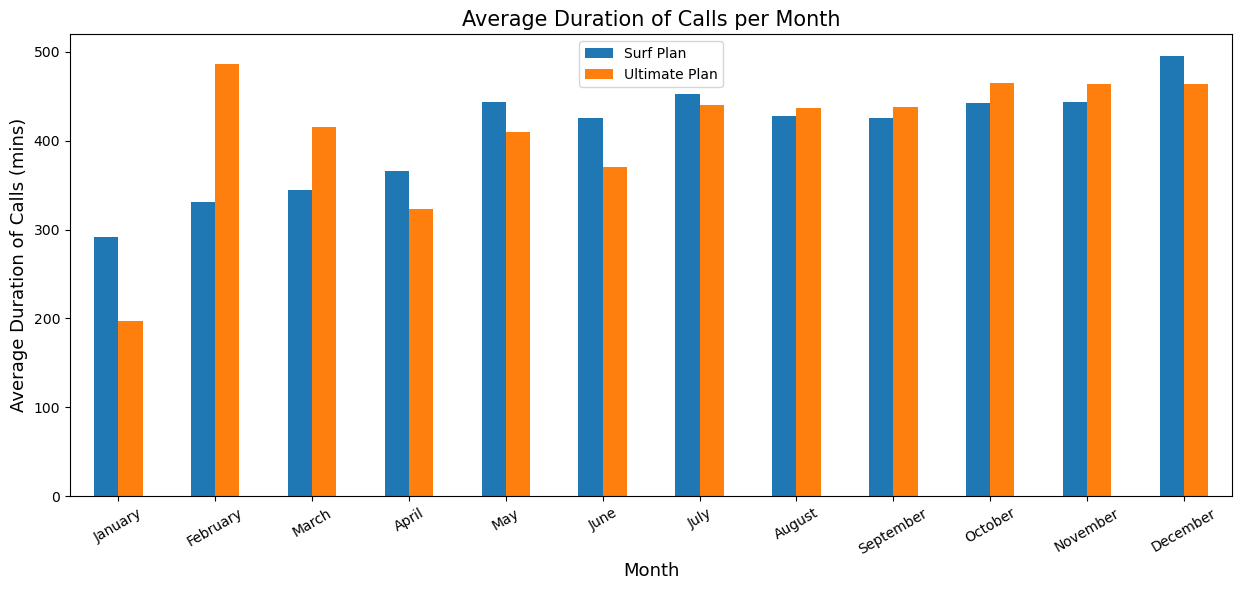

In [44]:
# Compare average duration of calls per each plan per each distinct month
# Extract the average duration of calls per each plan per month
# Combine the average duration data
# Plot a bar plat to visualize it
surf_avg_calls = mnth_totals[mnth_totals['plan']=='surf'].groupby('month')['tot_mins'].mean()
ultimate_avg_calls = mnth_totals[mnth_totals['plan']=='ultimate'].groupby('month')['tot_mins'].mean()
avg_call_durations = pd.concat([surf_avg_calls,ultimate_avg_calls],axis='columns')
avg_call_durations.columns = ['surf','ultimate']
avg_call_durations.plot(kind='bar',
                        y=['surf','ultimate'],
                        figsize=[15,6])
plt.xlabel('Month',fontsize=13)
plt.ylabel('Average Duration of Calls (mins)',fontsize=13)
plt.title('Average Duration of Calls per Month',fontsize=15)
plt.xticks([i for i in range(len(avg_call_durations))],rotation=30, labels=
           ['January','February','March','April','May','June','July','August',
            'September','October','November','December'])
plt.legend(['Surf Plan','Ultimate Plan'])
plt.show()

**Conclusion** The average duration of calls for each plan is actually fairly similar except for the first 4 months out the year. It is also interesting to see that the average duration of calls is significantly lower for both plans in January. Overall, the average duration of calls for the Ultimate plan, varies more throughout the year. The average duration for the surf plan shows more of a steady rise throughout the year ending with its peak in December. 

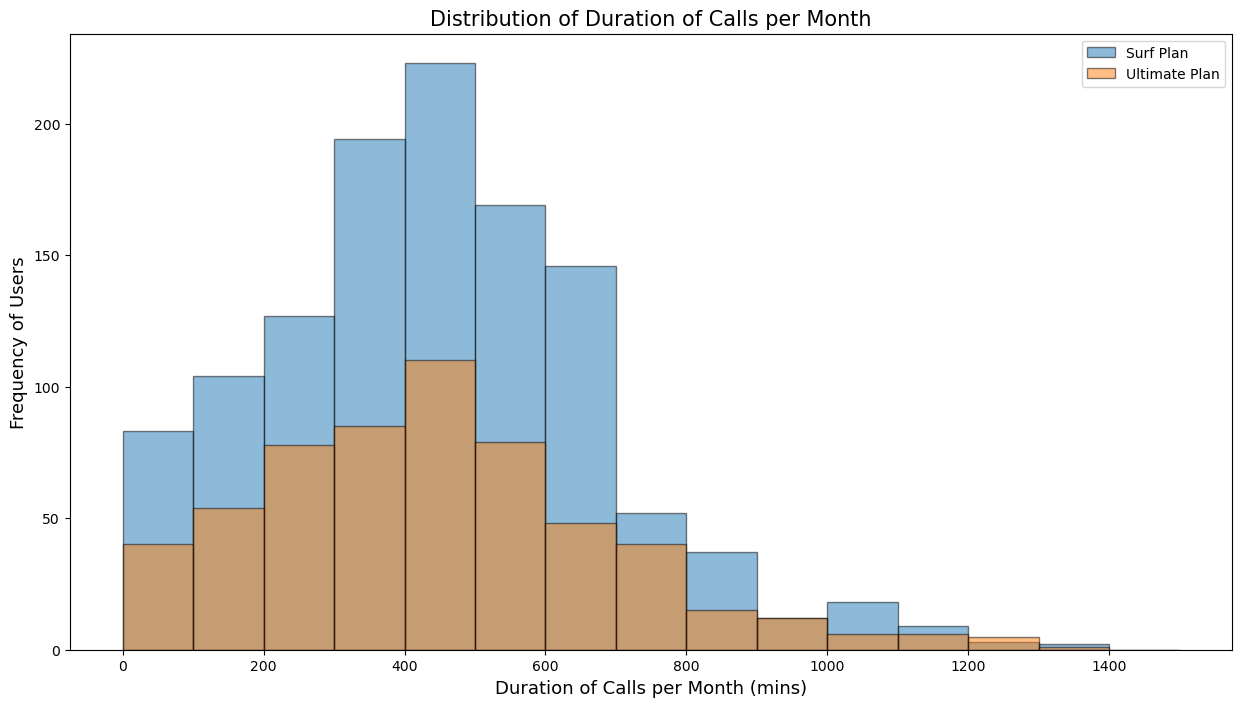

In [45]:
# Compare the number of minutes users of each plan require each month
# Extract the total minutes each user uses in a month per each plan
# Plot both data distributions on a histogram
surf_mnth_mins = mnth_totals[mnth_totals['plan']=='surf']['tot_mins']
ultimate_mnth_mins = mnth_totals[mnth_totals['plan']=='ultimate']['tot_mins']
surf_mnth_mins.plot(kind='hist',
                    bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500],
                    alpha=0.5,
                    edgecolor='black',
                    figsize=[15,8])
ultimate_mnth_mins.plot(kind='hist',
                        bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500],
                        edgecolor='black',
                        alpha=0.5)
plt.xlabel('Duration of Calls per Month (mins)',fontsize=13)
plt.ylabel('Frequency of Users',fontsize=13)
plt.title('Distribution of Duration of Calls per Month',fontsize=15)
plt.legend(['Surf Plan','Ultimate Plan'])
plt.show()

**Conclusion** Looking at the distribution of duration of calls for each plan, we can see that there is a larger proportion of clients under the Surf Plan in the sample data. The distributions for both plans are slightly positively skewed. Both plan distributions could potentially have outliers. 

In [46]:
# Calculate the mean, variance & standard deviation of the monthly call duration for each plan
surf_mins_mean = surf_mnth_mins.mean()
surf_mins_var = np.var(surf_mnth_mins)
surf_mins_std = np.std(surf_mnth_mins)
ultimate_mins_mean = ultimate_mnth_mins.mean()
ultimate_mins_var = np.var(ultimate_mnth_mins)
ultimate_mins_std = np.std(ultimate_mnth_mins)
print(f'Mean of Surf Plan Monthly Call Duration: {surf_mins_mean.round(2)}\n'
      f'Variance of Surf Plan Monthly Call Duration: {surf_mins_var.round(2)}\n'
      f'Standard Deviation of Surf Plan Monthly Call Duration: {surf_mins_std.round(2)}\n'
      f'\n'
      f'Mean of Ultimate Plan Monthly Call Duration: {ultimate_mins_mean.round(2)}\n'
      f'Variance of Ultimate Plan Monthly Call Duration: {ultimate_mins_var.round(2)}\n'
     f'Standard Deviation of Surf Plan Monthly Call Duration: {ultimate_mins_std.round(2)}')

Mean of Surf Plan Monthly Call Duration: 445.78
Variance of Surf Plan Monthly Call Duration: 55274.53
Standard Deviation of Surf Plan Monthly Call Duration: 235.11

Mean of Ultimate Plan Monthly Call Duration: 442.51
Variance of Ultimate Plan Monthly Call Duration: 62180.82
Standard Deviation of Surf Plan Monthly Call Duration: 249.36


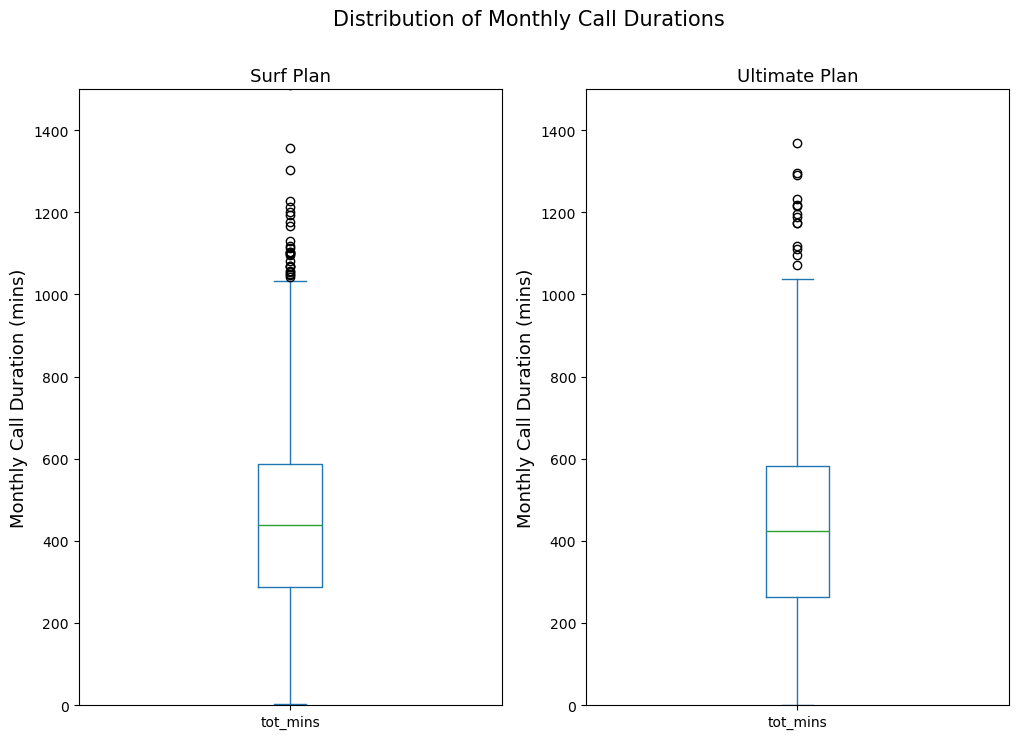

In [47]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.subplot(121)
surf_mnth_mins.plot(kind='box',figsize=[12,8])
plt.ylim(0,1500)
plt.ylabel('Monthly Call Duration (mins)',fontsize=13)
plt.title('Surf Plan',fontsize=13)
plt.subplot(122)
ultimate_mnth_mins.plot(kind='box')
plt.ylim(0,1500)
plt.ylabel('Monthly Call Duration (mins)',fontsize=13)
plt.title('Ultimate Plan',fontsize=13)
plt.suptitle('Distribution of Monthly Call Durations',fontsize=15)
plt.show()

**Conclusion** Overall, the distributions for monthly call durations for both plans are somewhat similar. The means and standard deviation are close and they are both slightly positively skewed. You can also see that both distributions do have outliers, although it does appear that the Surf Plan has a larger # of outliers than the Ultimate Plan. In regards to the clients' usage and the plan limits, all clients of the Ultimate Plan stayed under the plan limits, whereas less than 75% of clients of the Surf Plan stayed under the plan limits. 

### Messages

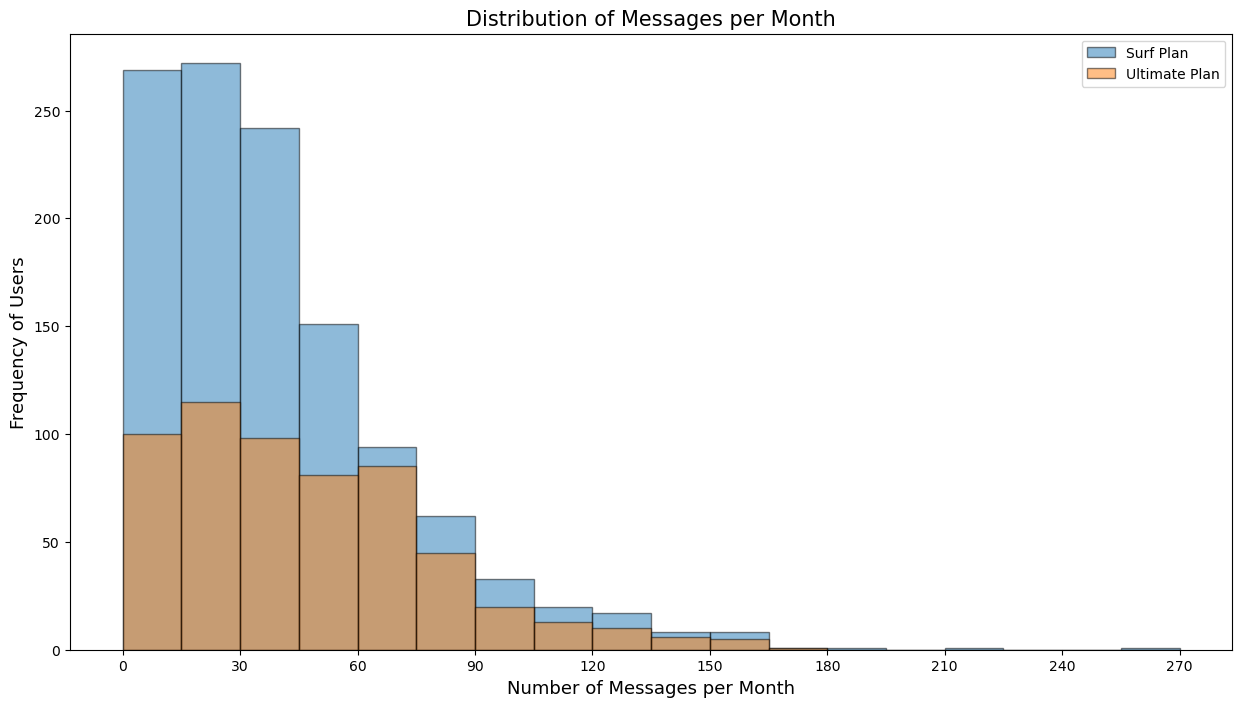

In [48]:
# Compare the number of messages users of each plan tend to send each month
# Extract the total messages each user uses in a month per each plan
# Plot both data distributions on a histogram
surf_mnth_msgs = mnth_totals[mnth_totals['plan']=='surf']['tot_msgs']
ultimate_mnth_msgs = mnth_totals[mnth_totals['plan']=='ultimate']['tot_msgs']
surf_mnth_msgs.plot(kind='hist',
                    bins=[0,15,30,45,60,75,90,105,120,135,150,165,180,195,210,225,240,255,270],
                    alpha=0.5,
                    edgecolor='black',
                    figsize=[15,8])
ultimate_mnth_msgs.plot(kind='hist',
                        bins=[0,15,30,45,60,75,90,105,120,135,150,165,180,195,210,225,240,255,270],
                        edgecolor='black',
                        alpha=0.5)
plt.xlabel('Number of Messages per Month',fontsize=13)
plt.ylabel('Frequency of Users',fontsize=13)
plt.xticks([0,30,60,90,120,150,180,210,240,270])
plt.title('Distribution of Messages per Month',fontsize=15)
plt.legend(['Surf Plan','Ultimate Plan'])
plt.show()

**Conclusion** The distribution for both plans are positively skewed and could potentially have outliers.

In [49]:
# Calculate the mean, variance & standard deviation of the monthly number of messages for each plan
surf_msgs_mean = surf_mnth_msgs.mean()
surf_msgs_var = np.var(surf_mnth_msgs)
surf_msgs_std = np.std(surf_mnth_msgs)
ultimate_msgs_mean = ultimate_mnth_msgs.mean()
ultimate_msgs_var = np.var(ultimate_mnth_msgs)
ultimate_msgs_std = np.std(ultimate_mnth_msgs)
print(f'Mean of Surf Plan Monthly Messages: {surf_msgs_mean.round(2)}\n'
      f'Variance of Surf Plan Monthly Messages: {surf_msgs_var.round(2)}\n'
      f'Standard Deviation of Surf Plan Monthly Messages: {surf_msgs_std.round(2)}\n'
      f'\n'
      f'Mean of Ultimate Plan Monthly Messages: {ultimate_msgs_mean.round(2)}\n'
      f'Variance of Ultimate Plan Monthly Messages: {ultimate_msgs_var.round(2)}\n'
      f'Standard Deviation of Surf Plan Monthly Messages: {ultimate_msgs_std.round(2)}')

Mean of Surf Plan Monthly Messages: 39.49
Variance of Surf Plan Monthly Messages: 1043.33
Standard Deviation of Surf Plan Monthly Messages: 32.3

Mean of Ultimate Plan Monthly Messages: 46.46
Variance of Ultimate Plan Monthly Messages: 1082.52
Standard Deviation of Surf Plan Monthly Messages: 32.9


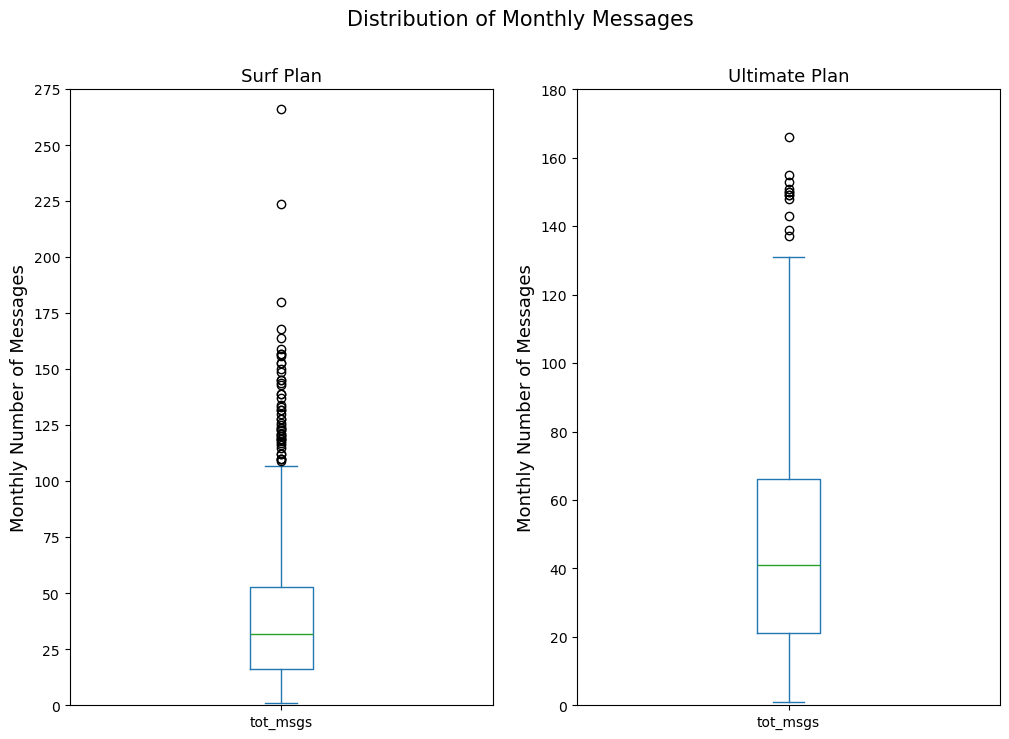

In [50]:
# Plot a boxplot to visualize the distribution of the monthly messages
plt.subplot(121)
surf_mnth_msgs.plot(kind='box',figsize=[12,8])
plt.ylim(0,275)
plt.yticks([0,25,50,75,100,125,150,175,200,225,250,275])
plt.ylabel('Monthly Number of Messages',fontsize=13)
plt.title('Surf Plan',fontsize=13)
plt.subplot(122)
ultimate_mnth_msgs.plot(kind='box')
plt.ylim(0,180)
plt.ylabel('Monthly Number of Messages',fontsize=13)
plt.title('Ultimate Plan',fontsize=13)
plt.suptitle('Distribution of Monthly Messages',fontsize=15)
plt.show()

**Concusion** The distributions for messages have some differences for the two different plans. While both distributions are slightly positively skewed, the distribution for the Surf Plan has more extreme outliers. The distribution for the Ultimate Plan has a larger mean. A larger proportion of clients on the Surf Plan had 50 messages or less per month. All of the Ultimate Plan clients have stayed under the plan limits, but about 25% of the Surf Plan clients have gone over the plan limits for monthly messages. Overall the Ultimate Plan clients do tend to message more each month as compared to the Surf Plan clients.

### Internet

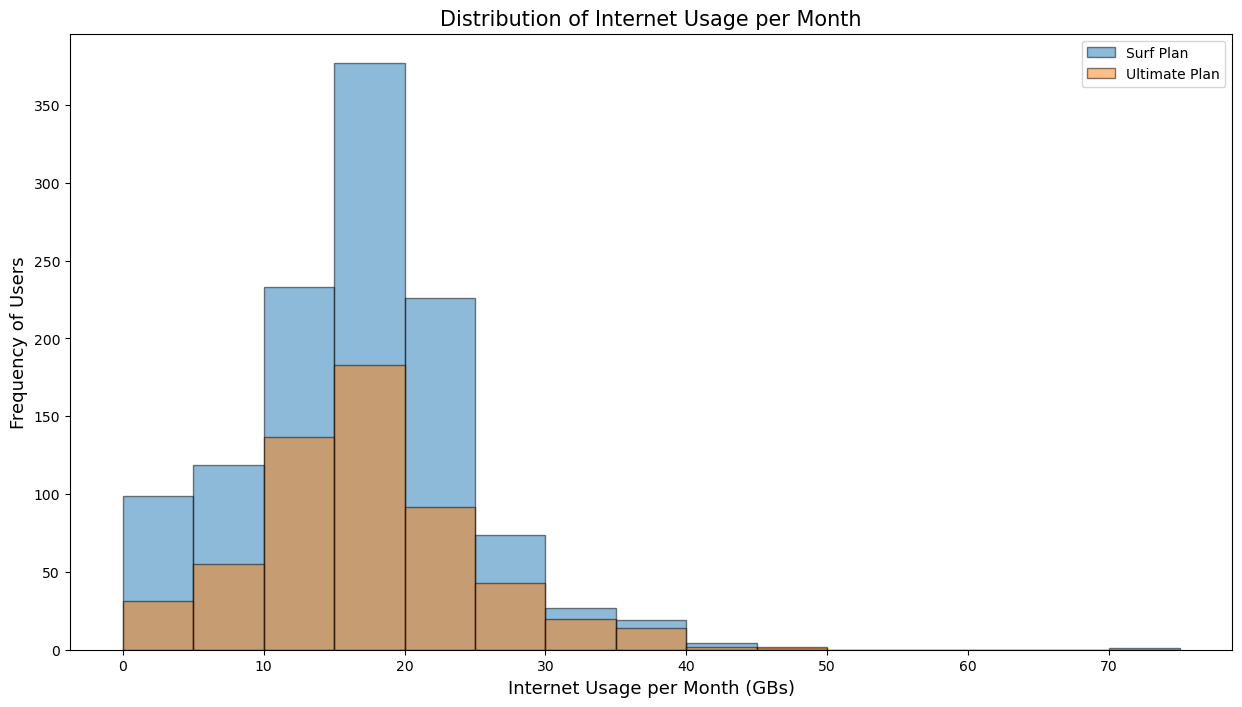

In [51]:
# Compare the users monthly internet traffic usage for each plan
# Extract the total internet traffic usage for each user in a month per each plan
# Plot both data distributions on a histogram
surf_mnth_int = mnth_totals[mnth_totals['plan']=='surf']['tot_mb'].divide(1000)
ultimate_mnth_int = mnth_totals[mnth_totals['plan']=='ultimate']['tot_mb'].divide(1000)
surf_mnth_int.plot(kind='hist',
                    bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75],
                    alpha=0.5,
                    edgecolor='black',
                    figsize=[15,8])
ultimate_mnth_int.plot(kind='hist',
                        bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75],
                        edgecolor='black',
                        alpha=0.5)
plt.xlabel('Internet Usage per Month (GBs)',fontsize=13)
plt.ylabel('Frequency of Users',fontsize=13)
plt.title('Distribution of Internet Usage per Month',fontsize=15)
plt.legend(['Surf Plan','Ultimate Plan'])
plt.show()

**Conclusion** The distributions of internet usage for both plans appear to be much more symmetrical than the previous distributions. Both distributions potentially could have outliers. 

In [52]:
# Calculate the mean, variance & standard deviation of the monthly internet traffic usage for each plan
surf_int_mean = surf_mnth_int.mean()
surf_int_var = np.var(surf_mnth_int)
surf_int_std = np.std(surf_mnth_int)
ultimate_int_mean = ultimate_mnth_int.mean()
ultimate_int_var = np.var(ultimate_mnth_int)
ultimate_int_std = np.std(ultimate_mnth_int)
print(f'Mean of Surf Plan Monthly Internet Traffic: {surf_int_mean.round(2)} GBs\n'
      f'Variance of Surf Plan Monthly Internet Traffic: {surf_int_var.round(2)}\n'
      f'Standard Deviation of Surf Plan Monthly Internet Traffic: {surf_int_std.round(2)}\n'
      f'\n'
      f'Mean of Ultimate Plan Monthly Internet Traffic: {ultimate_int_mean.round(2)} GBs\n'
      f'Variance of Ultimate Plan Monthly Internet Traffic: {ultimate_int_var.round(2)}\n'
      f'Standard Deviation of Surf Plan Monthly Internet Traffic: {ultimate_int_std.round(2)}')

Mean of Surf Plan Monthly Internet Traffic: 16.63 GBs
Variance of Surf Plan Monthly Internet Traffic: 59.46
Standard Deviation of Surf Plan Monthly Internet Traffic: 7.71

Mean of Ultimate Plan Monthly Internet Traffic: 17.25 GBs
Variance of Ultimate Plan Monthly Internet Traffic: 58.99
Standard Deviation of Surf Plan Monthly Internet Traffic: 7.68


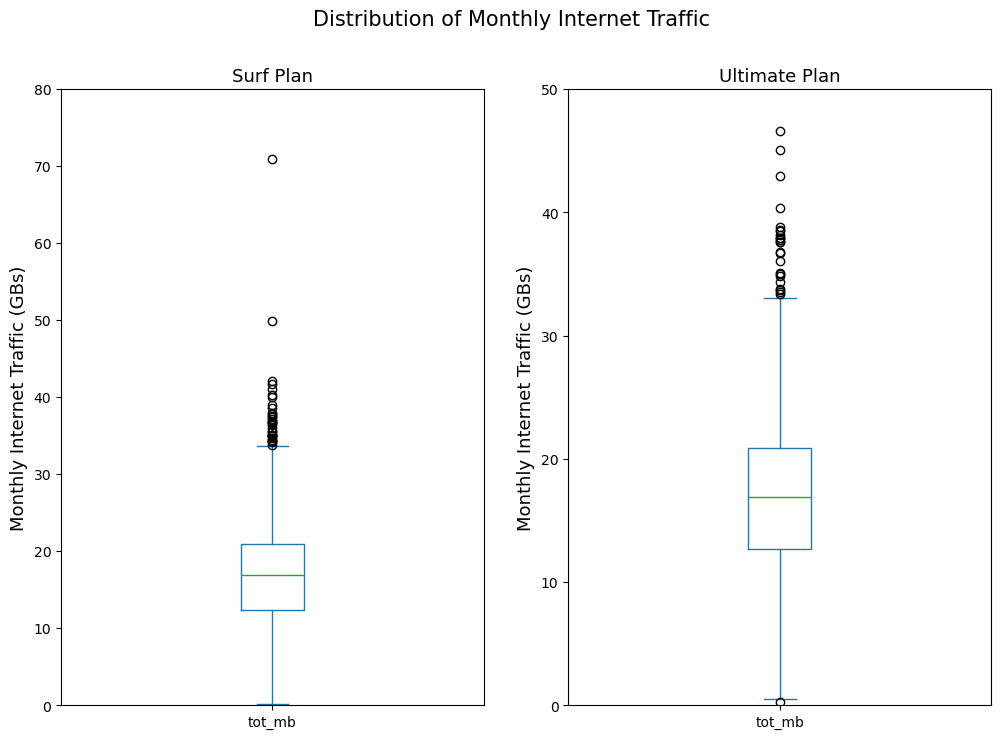

In [53]:
# Plot a boxplot to visualize the distribution of the monthly internet traffice usage
plt.subplot(121)
surf_mnth_int.plot(kind='box',figsize=[12,8])
plt.ylim(0,80)
plt.ylabel('Monthly Internet Traffic (GBs)',fontsize=13)
plt.title('Surf Plan',fontsize=13)
plt.subplot(122)
ultimate_mnth_int.plot(kind='box')
plt.ylim(0,50)
plt.ylabel('Monthly Internet Traffic (GBs)',fontsize=13)
plt.title('Ultimate Plan',fontsize=13)
plt.suptitle('Distribution of Monthly Internet Traffic',fontsize=15)
plt.show()

**Conclusion** The distributions for both plans do appear to be more symmetrical than the previous distributions. The Surf Plan has more extreme outliers than the Ultimate Plan. A larger proportion of clients on the Ultimate Plan stayed under their plan limits as compared to more than 50% of the client for the Surf Plan is actually over the plan limits of 15BG. Overall the distributions for both plans do appear to be fairly similar. 

### Revenue

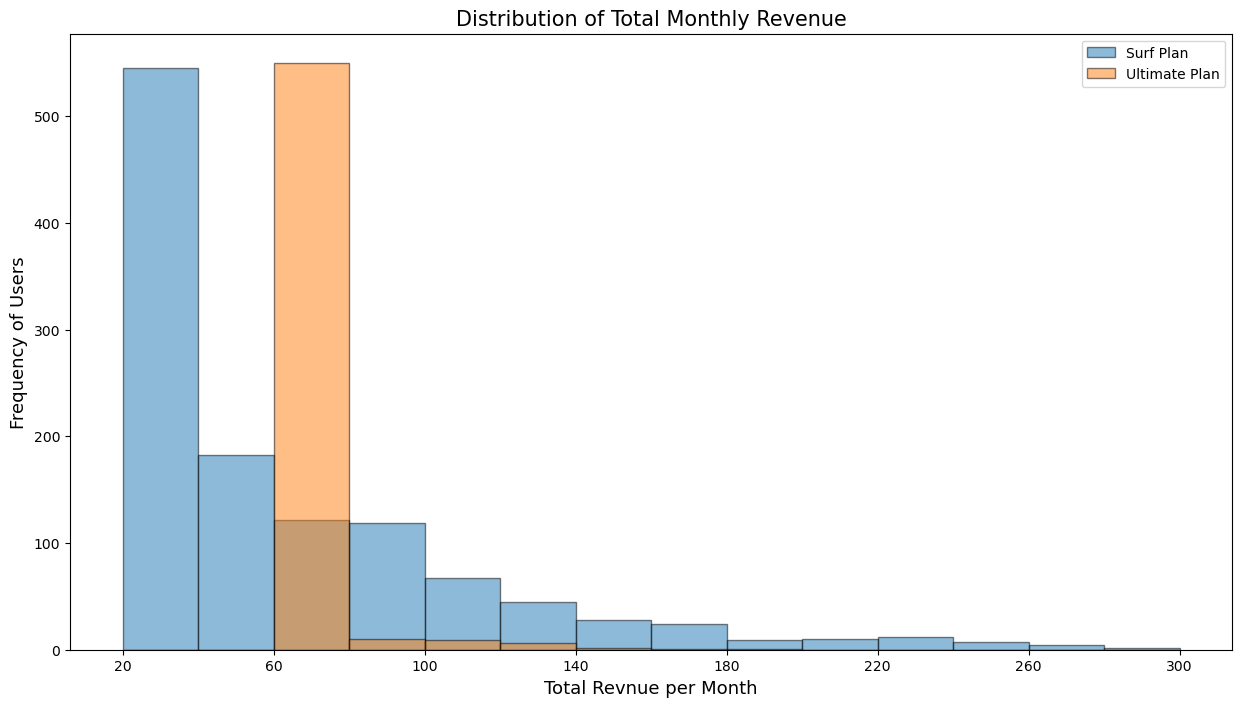

In [54]:
# Compare the users monthly total revenue for each plan
# Extract the total revenue for each user in a month per each plan
# Plot both data distributions on a histogram
surf_mnth_rev = mnth_totals[mnth_totals['plan']=='surf']['tot_rev']
ultimate_mnth_rev = mnth_totals[mnth_totals['plan']=='ultimate']['tot_rev']
surf_mnth_rev.plot(kind='hist',
                    bins=[20,40,60,80,100,120,140,160,180,200,220,240,260,280,300],
                    alpha=0.5,
                    edgecolor='black',
                    figsize=[15,8])
ultimate_mnth_rev.plot(kind='hist',
                        bins=[20,40,60,80,100,120,140,160,180,200,220,240,260,280,300],
                        edgecolor='black',
                        alpha=0.5)
plt.xlabel('Total Revnue per Month',fontsize=13)
plt.ylabel('Frequency of Users',fontsize=13)
plt.xticks([20,60,100,140,180,220,260,300])
plt.title('Distribution of Total Monthly Revenue',fontsize=15)
plt.legend(['Surf Plan','Ultimate Plan'])
plt.show()

**Conclusion** There is more of a spread to the distribution of total monthly revenue for the Surf Plan. The Ultimate Plan distribution is centered around the base price of $70/month. The distribution for the Surf Plan is positively skewed and both distributions could potentially have outliers. 

In [55]:
# Calculate the mean, variance & standard deviation of the monthly total revenue for each plan
surf_rev_mean = surf_mnth_rev.mean()
surf_rev_var = np.var(surf_mnth_rev)
surf_rev_std = np.std(surf_mnth_rev)
ultimate_rev_mean = ultimate_mnth_rev.mean()
ultimate_rev_var = np.var(ultimate_mnth_rev)
ultimate_rev_std = np.std(ultimate_mnth_rev)
print(f'Mean of Surf Plan Monthly Revenue: {surf_rev_mean.round(2)}\n'
      f'Variance of Surf Plan Monthly Revenue: {surf_rev_var.round(2)}\n'
      f'Standard Deviation of Surf Plan Monthly Revenue: {surf_rev_std.round(2)}\n'
      f'\n'
      f'Mean of Ultimate Plan Monthly Revenue: {ultimate_rev_mean.round(2)}\n'
      f'Variance of Ultimate Plan Monthly Revenue: {ultimate_rev_var.round(2)}\n'
      f'Standard Deviation of Ultimate Plan Monthly Revenue: {ultimate_rev_std.round(2)}')

Mean of Surf Plan Monthly Revenue: 60.42
Variance of Surf Plan Monthly Revenue: 2870.07
Standard Deviation of Surf Plan Monthly Revenue: 53.57

Mean of Ultimate Plan Monthly Revenue: 72.25
Variance of Ultimate Plan Monthly Revenue: 121.55
Standard Deviation of Ultimate Plan Monthly Revenue: 11.02


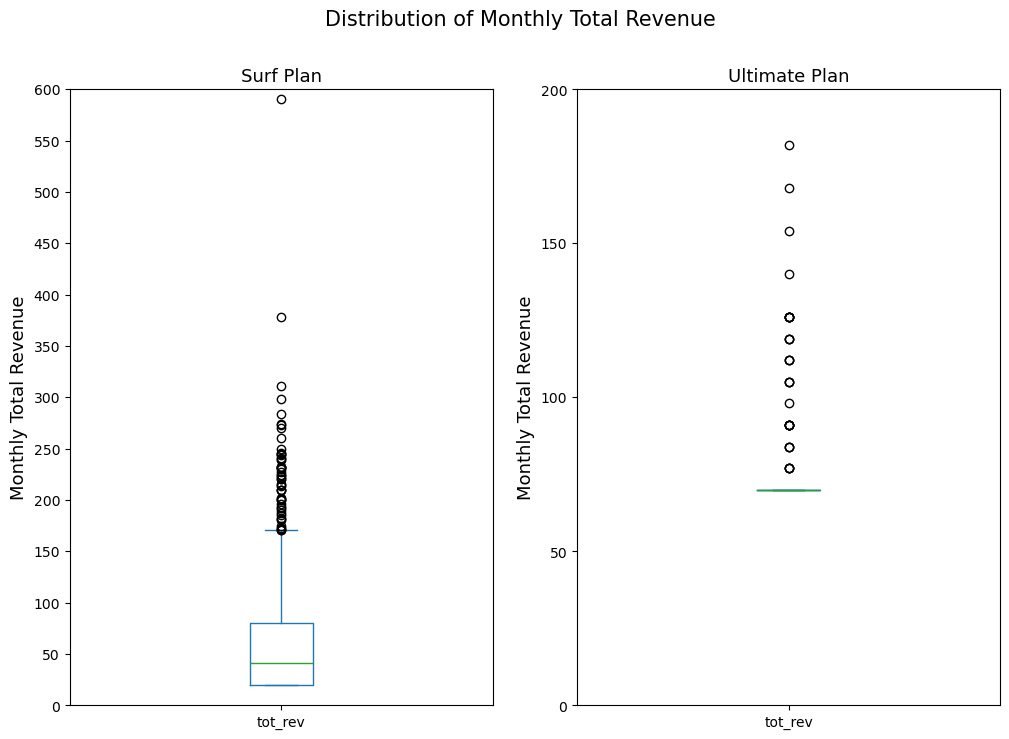

In [56]:
# Plot a boxplot to visualize the distribution of the monthly internet traffice usage
plt.subplot(121)
surf_mnth_rev.plot(kind='box',figsize=[12,8])
plt.ylim(0,600)
plt.yticks([0,50,100,150,200,250,300,350,400,450,500,550,600])
plt.ylabel('Monthly Total Revenue',fontsize=13)
plt.title('Surf Plan',fontsize=13)
plt.subplot(122)
ultimate_mnth_rev.plot(kind='box')
plt.ylim(0,200)
plt.yticks([0,50,100,150,200])
plt.ylabel('Monthly Total Revenue',fontsize=13)
plt.title('Ultimate Plan',fontsize=13)
plt.suptitle('Distribution of Monthly Total Revenue',fontsize=15)
plt.show()

**Conclusion** The distribution of monthly total revenue is much more dispersed for the Surf Plan. Most of the monthly total revenue distribution for the Ultimate Plan is actually for the 70 base cost. This means that most clients with this plan, tend to stay under the plan limits and do not pay anything additional on top of the base cost. The mean of distribution for the Ultimate Plan is also higher than the Surf Plan distribution, but only by 12. While the Surf Plan has some extreme outliers in it's distribution, 50 percent of the monthly total revenue distribution is actually under 50. The boxplot also shows that only 25 percent of the Surf Plan's distribution stayed under the plan limits and only paid the base price of 20 dollars. This means that clients with the Surf Plan and more likely to exceed the plan limits and pay more than the base price vs the clients with the Ultimate Plan. 

## Statistical Testing

### Test equality of average revenue for each plan
Using the total monthly revenue distributions for each plan, I will test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs. 

I will be using the following hypotheses and critical statistical significance of alpha. 
- Null Hypothesis: The average revenue from users of the Ultimate and Surf calling plans are equal
- Alternative Hypothesis: The average revenue from users of the Ultimate and Surf calling plans are not equal
- Alpha Value: 5 percent

In [57]:
# Test the hypotheses
alpha = 0.05

results1 = st.ttest_ind(surf_mnth_rev,ultimate_mnth_rev)

print(f'p-value: {results1.pvalue}')

p-value: 1.6396969942407266e-07


**Conclusion** The pvalue is less than the determined alpha value. We can reject the null hypothesis and can conclude that the average revenue for the Ultimate Plan & Surf Plan are statistically significantly different. 

### Test average revenue for Ultimate Plan is greater than the Surf Plan
Using the total monthly revenue distributions for each plan, I will test the hypothesis that the average revenue from users of the Surf Plan is greater than the Ultimate Plan 

I will be using the following hypotheses and critical statistical significance of alpha. 
- Null Hypothesis: The average revenue from users of the Ultimate and Surf calling plans are equal
- Alternative Hypothesis: The average revenue from users of the Surf Plan is less than the Ultimate Plan
- Alpha Value: 5 percent

In [58]:
# Test the hypotheses
alpha = 0.05

results2 = st.ttest_ind(surf_mnth_rev,ultimate_mnth_rev,alternative='less')

print(f'p-value: {results2.pvalue}')

p-value: 8.198484971203633e-08


**Conclusion** The pvalue is less than the determined alpha value. We can reject the null hypothesis and can conclude that the average revenue for the Surf Plan is less than the Ultimate Plan. 

### Test equality of average revenue from users in the NY-NJ area vs. all other users
Using the monthly totals dataframe, I will extract 2 datasets of the total monthly revenue by user for users in the NY-NJ area & for users from all other regions. 

In [59]:
# Create two new datasets based on the users location
nynj_user_rev = mnth_totals[mnth_totals['region']=='NY-NJ-PA MSA']['tot_rev']
other_user_rev = mnth_totals[mnth_totals['region']!='NY-NJ-PA MSA']['tot_rev']

I will be using the following hypotheses and critical statistical significance of alpha. 
- Null Hypothesis: The average revenue from users of from the NY-NJ region & all other regions are equal
- Alternative Hypothesis: he average revenue from users of from the NY-NJ region & all other regions are not equal
- Alpha Value: 5 percent

In [60]:
# Test the hypotheses
alpha = 0.05

results3 = st.ttest_ind(nynj_user_rev,other_user_rev)

print(f'p-value: {results3.pvalue}')

p-value: 0.010353440224856581


**Conclusion** The pvalue is less than the determined alpha value. We must reject the null hypothesis and can determine that the average revenue from users in the NY-NJ area does differ from the average revenue from all other regions. 

# Conclusion

After analyzing the user behavior for both plans as well as testing some statistical hypotheses in regards to the average revenue for the plans, I have determined that the Surf Plan is the more profitable prepaid plan. While the average revenue for the Ultimate Plan was higher, clients of the Surf Plan has more potential to have higher monthly revenues. With such high plan limits for the Ultimate Plan, it is less likely for an Ultimate Plan client to exceed their monthly limits and pay any additional costs on top of the base cost. This means almost all of the clients under the Ultimate Plan will only pay 70 dollars a month. In contrast, the total monthly revenues distribution showed that only 25 percent of clients stay within the monthly plan limits. This means that a large proportion of clients are more likely to pay additional costs on top of the base cost. This is shown especially with the user behavior for internet traffic. Half of the distribution of clients internet usage is actually over the monthly limits. Also looking at the distribution of total monthly revenues for the Surf Plan we can see that 25 percent of the distribution is over 70 dollars. This is a significant amount of the population that will be paying more than the base cost of the Ultimate Plan and shows that there is more revenue potential with the Surf Plan. 